# Web-Scraping Election Poll Data

Practicing scraping data from a presidential election poll site. 

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import numpy as np

In [6]:
html_tbl ='''<table class="data large"><tr class="header"><th class="noCenter">Poll</th><th class="date">Date</th><th class="sample">Sample</th><th class="diag"><div><span>Biden </span></div></th><th class="diag"><div><span>Sanders </span></div></th><th class="diag"><div><span>Warren </span></div></th><th class="diag"><div><span>Buttigieg </span></div></th><th class="diag"><div><span>Bloomberg </span></div></th><th class="diag"><div><span>Klobuchar </span></div></th><th class="diag"><div><span>Yang </span></div></th><th class="diag"><div><span>Steyer </span></div></th><th class="diag"><div><span>Gabbard </span></div></th><th class="diag"><div><span>Bennet </span></div></th><th class="diag"><div><span>Delaney </span></div></th><th class="spread">Spread</th></tr><tr class="rcpAvg"><td class="noCenter">RCP Average</td><td>1/8 - 1/21</td><td class="sample">--</td><td class="">28.1</td><td class="">21.6</td><td class="">15.0</td><td class="">7.7</td><td class="">7.4</td><td class="">3.6</td><td class="">3.6</td><td class="">2.1</td><td class="">1.4</td><td class="">0.8</td><td class="">0.3</td><td class="spread"><span style="color: #000000;">Biden +6.5</span></td></tr><tr class="isInRcpAvg" data-id="126054"><td class="noCenter"><a class="normal_pollster_name" href="https://cdn.cnn.com/cnn/2020/images/01/22/rel1b.-.2020.pdf">CNN</a><a class="mobile_pollster_name" href="https://cdn.cnn.com/cnn/2020/images/01/22/rel1b.-.2020.pdf">CNN</a></td><td>1/16 - 1/19</td><td class="sample">500 RV</td><td class="">24</td><td class="">27</td><td class="">14</td><td class="">11</td><td class="">5</td><td class="">4</td><td class="">4</td><td class="">2</td><td class="">0</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Sanders +3</span></td></tr><tr class="alt isInRcpAvg" data-id="126076"><td class="noCenter"><a class="normal_pollster_name" href="https://www.monmouth.edu/polling-institute/reports/monmouthpoll_US_012220/">Monmouth</a><a class="mobile_pollster_name" href="https://www.monmouth.edu/polling-institute/reports/monmouthpoll_US_012220/">Monmouth</a></td><td>1/16 - 1/20</td><td class="sample">372 RV</td><td class="">30</td><td class="">23</td><td class="">14</td><td class="">6</td><td class="">9</td><td class="">5</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="isInRcpAvg" data-id="126077"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/alq58zq5zt/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/alq58zq5zt/econTabReport.pdf">Economist</a></td><td>1/19 - 1/21</td><td class="sample">470 LV</td><td class="">28</td><td class="">18</td><td class="">21</td><td class="">8</td><td class="">6</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="alt isInRcpAvg" data-id="126055"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>1/15 - 1/19</td><td class="sample">12402 LV</td><td class="">29</td><td class="">24</td><td class="">15</td><td class="">8</td><td class="">10</td><td class="">3</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +5</span></td></tr><tr class="isInRcpAvg" data-id="126020"><td class="noCenter"><a class="normal_pollster_name" href="http://www.surveyusa.com/client/PollReport.aspx?g=b4747822-277e-4d2c-b896-eb4e04672c09">SurveyUSA</a><a class="mobile_pollster_name" href="http://www.surveyusa.com/client/PollReport.aspx?g=b4747822-277e-4d2c-b896-eb4e04672c09">SUSA</a></td><td>1/14 - 1/16</td><td class="sample">1086 LV</td><td class="">32</td><td class="">21</td><td class="">14</td><td class="">9</td><td class="">9</td><td class="">2</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">--</td><td class="">--</td><td class="spread"><span style="color: #000000;">Biden +11</span></td></tr><tr class="alt isInRcpAvg" data-id="125942"><td class="noCenter"><a class="normal_pollster_name" href="https://thehill.com/hilltv/rising/478208-sanders-hits-highest-support-since-august">The Hill/HarrisX</a><a class="mobile_pollster_name" href="https://thehill.com/hilltv/rising/478208-sanders-hits-highest-support-since-august">The Hill</a></td><td>1/13 - 1/14</td><td class="sample">451 RV</td><td class="">29</td><td class="">19</td><td class="">11</td><td class="">4</td><td class="">7</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +10</span></td></tr><tr class="isInRcpAvg" data-id="125917"><td class="noCenter"><a class="normal_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3653">Quinnipiac</a><a class="mobile_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3653">Quinnipiac</a></td><td>1/8 - 1/12</td><td class="sample">651 RV</td><td class="">25</td><td class="">19</td><td class="">16</td><td class="">8</td><td class="">6</td><td class="">4</td><td class="">5</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +6</span></td></tr></table>, <table class="chart_legend" data-p-type="1"><tbody><tr><td class="candidate"><div class="value"><span style="background: #009900;">28.1</span></div><div class="desc">Biden <span style="color: #009900;">+6.5</span></div></td><td class="candidate"><div class="value"><span style="background: #457fff;">21.6</span></div><div class="desc">Sanders </div></td><td class="candidate"><div class="value"><span style="background: #996600;">15.0</span></div><div class="desc">Warren </div></td><td class="candidate"><div class="value"><span style="background: #990099;">7.7</span></div><div class="desc">Buttigieg </div></td></tr><tr><td class="candidate"><div class="value"><span style="background: #f2dc0f;">7.4</span></div><div class="desc">Bloomberg </div></td><td class="candidate"><div class="value"><span style="background: #000000;">3.6</span></div><div class="desc">Klobuchar </div></td><td class="candidate"><div class="value"><span style="background: #3da882;">3.6</span></div><div class="desc">Yang </div></td><td class="candidate"><div class="value"><span style="background: #666666;">2.1</span></div><div class="desc">Steyer </div></td></tr><tr><td class="candidate"><div class="value"><span style="background: #ff0074;">1.4</span></div><div class="desc">Gabbard </div></td><td class="candidate"><div class="value"><span style="background: #9966ff;">0.8</span></div><div class="desc">Bennet </div></td><td class="candidate"><div class="value"><span style="background: #990000;">0.3</span></div><div class="desc">Delaney </div></td><td class="candidate"><div class="value"><span style="background: #6672ff;">0.2</span></div><div class="desc">Patrick </div></td></tr><tr><td class="candidate"><div class="value"><span style="background: #ff9900;">--</span></div><div class="desc">Harris </div></td><td class="candidate"><div class="value"><span style="background: #ff66ff;">--</span></div><div class="desc">O'Rourke </div></td><td class="candidate"><div class="value"><span style="background: #66ccff;">--</span></div><div class="desc">Booker </div></td><td class="candidate"><div class="value"><span style="background: #cc9900;">--</span></div><div class="desc">Castro </div></td></tr></tbody></table>, <table border="0" cellpadding="0" cellspacing="0" class="embed"><tr><td><a href="https://www.realclearpolitics.com"><img src="/asset/img/logo/realclearpolitics_logo_word_only_124.png"/></a></td><td align="right"><img src="/images/blank.png"/></td></tr></table>, <table class="data large"><tr class="header"><th class="noCenter">Poll</th><th class="date">Date</th><th class="sample">Sample</th><th class="diag"><div><span>Biden </span></div></th><th class="diag"><div><span>Sanders </span></div></th><th class="diag"><div><span>Warren </span></div></th><th class="diag"><div><span>Buttigieg </span></div></th><th class="diag"><div><span>Bloomberg </span></div></th><th class="diag"><div><span>Klobuchar </span></div></th><th class="diag"><div><span>Yang </span></div></th><th class="diag"><div><span>Steyer </span></div></th><th class="diag"><div><span>Gabbard </span></div></th><th class="diag"><div><span>Bennet </span></div></th><th class="diag"><div><span>Delaney </span></div></th><th class="spread">Spread</th></tr><tr class="rcpAvg"><td class="noCenter">RCP Average</td><td>1/8 - 1/21</td><td class="sample">--</td><td class="">28.1</td><td class="">21.6</td><td class="">15.0</td><td class="">7.7</td><td class="">7.4</td><td class="">3.6</td><td class="">3.6</td><td class="">2.1</td><td class="">1.4</td><td class="">0.8</td><td class="">0.3</td><td class="spread"><span style="color: #000000;">Biden +6.5</span></td></tr><tr class="isInRcpAvg" data-id="126054"><td class="noCenter"><a class="normal_pollster_name" href="https://cdn.cnn.com/cnn/2020/images/01/22/rel1b.-.2020.pdf">CNN</a><a class="mobile_pollster_name" href="https://cdn.cnn.com/cnn/2020/images/01/22/rel1b.-.2020.pdf">CNN</a></td><td>1/16 - 1/19</td><td class="sample">500 RV</td><td class="">24</td><td class="">27</td><td class="">14</td><td class="">11</td><td class="">5</td><td class="">4</td><td class="">4</td><td class="">2</td><td class="">0</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Sanders +3</span></td></tr><tr class="alt isInRcpAvg" data-id="126076"><td class="noCenter"><a class="normal_pollster_name" href="https://www.monmouth.edu/polling-institute/reports/monmouthpoll_US_012220/">Monmouth</a><a class="mobile_pollster_name" href="https://www.monmouth.edu/polling-institute/reports/monmouthpoll_US_012220/">Monmouth</a></td><td>1/16 - 1/20</td><td class="sample">372 RV</td><td class="">30</td><td class="">23</td><td class="">14</td><td class="">6</td><td class="">9</td><td class="">5</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="isInRcpAvg" data-id="126077"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/alq58zq5zt/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/alq58zq5zt/econTabReport.pdf">Economist</a></td><td>1/19 - 1/21</td><td class="sample">470 LV</td><td class="">28</td><td class="">18</td><td class="">21</td><td class="">8</td><td class="">6</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="alt isInRcpAvg" data-id="126055"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>1/15 - 1/19</td><td class="sample">12402 LV</td><td class="">29</td><td class="">24</td><td class="">15</td><td class="">8</td><td class="">10</td><td class="">3</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +5</span></td></tr><tr class="isInRcpAvg" data-id="126020"><td class="noCenter"><a class="normal_pollster_name" href="http://www.surveyusa.com/client/PollReport.aspx?g=b4747822-277e-4d2c-b896-eb4e04672c09">SurveyUSA</a><a class="mobile_pollster_name" href="http://www.surveyusa.com/client/PollReport.aspx?g=b4747822-277e-4d2c-b896-eb4e04672c09">SUSA</a></td><td>1/14 - 1/16</td><td class="sample">1086 LV</td><td class="">32</td><td class="">21</td><td class="">14</td><td class="">9</td><td class="">9</td><td class="">2</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">--</td><td class="">--</td><td class="spread"><span style="color: #000000;">Biden +11</span></td></tr><tr class="alt" data-id="125964"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/ueji3eha6i/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/ueji3eha6i/econTabReport.pdf">Economist</a></td><td>1/11 - 1/14</td><td class="sample">521 RV</td><td class="">27</td><td class="">20</td><td class="">19</td><td class="">7</td><td class="">5</td><td class="">3</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="isInRcpAvg" data-id="125942"><td class="noCenter"><a class="normal_pollster_name" href="https://thehill.com/hilltv/rising/478208-sanders-hits-highest-support-since-august">The Hill/HarrisX</a><a class="mobile_pollster_name" href="https://thehill.com/hilltv/rising/478208-sanders-hits-highest-support-since-august">The Hill</a></td><td>1/13 - 1/14</td><td class="sample">451 RV</td><td class="">29</td><td class="">19</td><td class="">11</td><td class="">4</td><td class="">7</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +10</span></td></tr><tr class="alt isInRcpAvg" data-id="125917"><td class="noCenter"><a class="normal_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3653">Quinnipiac</a><a class="mobile_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3653">Quinnipiac</a></td><td>1/8 - 1/12</td><td class="sample">651 RV</td><td class="">25</td><td class="">19</td><td class="">16</td><td class="">8</td><td class="">6</td><td class="">4</td><td class="">5</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +6</span></td></tr><tr class="" data-id="125937"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>1/6 - 1/12</td><td class="sample">17096 RV</td><td class="">29</td><td class="">23</td><td class="">14</td><td class="">8</td><td class="">8</td><td class="">3</td><td class="">5</td><td class="">4</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +6</span></td></tr><tr class="alt" data-id="125935"><td class="noCenter"><a class="normal_pollster_name" href="https://www.investors.com/politics/joe-biden-leads-democratic-race-loses-electability-edge-vs-president-trump-ibd-tipp-poll/">IBD/TIPP</a><a class="mobile_pollster_name" href="https://www.investors.com/politics/joe-biden-leads-democratic-race-loses-electability-edge-vs-president-trump-ibd-tipp-poll/">IBD/TIPP</a></td><td>1/3 - 1/11</td><td class="sample">333 RV</td><td class="">26</td><td class="">15</td><td class="">20</td><td class="">9</td><td class="">7</td><td class="">3</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">0</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +6</span></td></tr><tr class="" data-id="125814"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/6s5t9qkjll/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/6s5t9qkjll/econTabReport.pdf">Economist</a></td><td>1/5 - 1/7</td><td class="sample">574 RV</td><td class="">27</td><td class="">20</td><td class="">22</td><td class="">7</td><td class="">3</td><td class="">3</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +5</span></td></tr><tr class="alt" data-id="125796"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>12/30 - 1/5</td><td class="sample">17213 RV</td><td class="">31</td><td class="">23</td><td class="">14</td><td class="">8</td><td class="">7</td><td class="">3</td><td class="">4</td><td class="">4</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +8</span></td></tr><tr class="" data-id="125769"><td class="noCenter"><a class="normal_pollster_name" href="https://harvardharrispoll.com/wp-content/uploads/2020/01/HHP_December2019_RegisteredVoters_Topline.pdf">Harvard-Harris</a><a class="mobile_pollster_name" href="https://harvardharrispoll.com/wp-content/uploads/2020/01/HHP_December2019_RegisteredVoters_Topline.pdf">Harris</a></td><td>12/27 - 12/29</td><td class="sample">756 RV</td><td class="">30</td><td class="">17</td><td class="">12</td><td class="">7</td><td class="">7</td><td class="">2</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">--</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +13</span></td></tr><tr class="alt" data-id="125744"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/2r6hyqtv9p/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/2r6hyqtv9p/econTabReport.pdf">Economist</a></td><td>12/28 - 12/31</td><td class="sample">548 RV</td><td class="">29</td><td class="">19</td><td class="">18</td><td class="">8</td><td class="">3</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +10</span></td></tr><tr class="" data-id="125767"><td class="noCenter"><a class="normal_pollster_name" href="https://thehill.com/hilltv/rising/476689-bloomberg-rises-to-third-place-alongside-warren-in-national-poll">The Hill/HarrisX</a><a class="mobile_pollster_name" href="https://thehill.com/hilltv/rising/476689-bloomberg-rises-to-third-place-alongside-warren-in-national-poll">The Hill</a></td><td>12/27 - 12/28</td><td class="sample">431 RV</td><td class="">28</td><td class="">16</td><td class="">11</td><td class="">6</td><td class="">11</td><td class="">2</td><td class="">2</td><td class="">2</td><td class="">2</td><td class="">0</td><td class="">2</td><td class="spread"><span style="color: #000000;">Biden +12</span></td></tr><tr class="alt" data-id="125742"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>12/23 - 12/29</td><td class="sample">17787 RV</td><td class="">32</td><td class="">21</td><td class="">14</td><td class="">8</td><td class="">6</td><td class="">3</td><td class="">4</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +11</span></td></tr><tr class="" data-id="125669"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/t4lyjjoemc/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/t4lyjjoemc/econTabReport.pdf">Economist</a></td><td>12/22 - 12/24</td><td class="sample">1240 RV</td><td class="">30</td><td class="">17</td><td class="">19</td><td class="">7</td><td class="">4</td><td class="">5</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">0</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +11</span></td></tr><tr class="alt" data-id="125668"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>12/20 - 12/22</td><td class="sample">7178 RV</td><td class="">31</td><td class="">21</td><td class="">15</td><td class="">9</td><td class="">6</td><td class="">3</td><td class="">5</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +10</span></td></tr><tr class="" data-id="125577"><td class="noCenter"><a class="normal_pollster_name" href="https://emersonpolling.reportablenews.com/pr/december-national-poll-biden-and-sanders-pull-away-from-the-pack-as-warren-falls">Emerson</a><a class="mobile_pollster_name" href="https://emersonpolling.reportablenews.com/pr/december-national-poll-biden-and-sanders-pull-away-from-the-pack-as-warren-falls">Emerson</a></td><td>12/15 - 12/17</td><td class="sample">525 RV</td><td class="">32</td><td class="">25</td><td class="">12</td><td class="">8</td><td class="">3</td><td class="">2</td><td class="">6</td><td class="">2</td><td class="">4</td><td class="">0</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="alt" data-id="125647"><td class="noCenter"><a class="normal_pollster_name" href="https://www.nbcnews.com/politics/meet-the-press/stable-political-base-biden-remains-top-dem-field-nbc-wsj-n1104496">NBC News/Wall St. Jrnl</a><a class="mobile_pollster_name" href="https://www.nbcnews.com/politics/meet-the-press/stable-political-base-biden-remains-top-dem-field-nbc-wsj-n1104496">NBC/WSJ</a></td><td>12/14 - 12/17</td><td class="sample">410 LV</td><td class="">28</td><td class="">21</td><td class="">18</td><td class="">9</td><td class="">4</td><td class="">5</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +7</span></td></tr><tr class="" data-id="125613"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/ua3ar45wbg/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/ua3ar45wbg/econTabReport.pdf">Economist</a></td><td>12/14 - 12/17</td><td class="sample">1164 RV</td><td class="">29</td><td class="">19</td><td class="">17</td><td class="">7</td><td class="">4</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +10</span></td></tr><tr class="alt" data-id="125648"><td class="noCenter"><a class="normal_pollster_name" href="https://cdn.cnn.com/cnn/2019/images/12/19/rel14b.-.2020.pdf">CNN</a><a class="mobile_pollster_name" href="https://cdn.cnn.com/cnn/2019/images/12/19/rel14b.-.2020.pdf">CNN</a></td><td>12/12 - 12/15</td><td class="sample">408 RV</td><td class="">26</td><td class="">20</td><td class="">16</td><td class="">8</td><td class="">5</td><td class="">3</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +6</span></td></tr><tr class="" data-id="125641"><td class="noCenter"><a class="normal_pollster_name" href="https://www.youtube.com/watch?v=d7Tqe1aEy-Y">The Hill/HarrisX</a><a class="mobile_pollster_name" href="https://www.youtube.com/watch?v=d7Tqe1aEy-Y">The Hill</a></td><td>12/13 - 12/14</td><td class="sample">456 RV</td><td class="">29</td><td class="">13</td><td class="">13</td><td class="">5</td><td class="">5</td><td class="">3</td><td class="">3</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">2</td><td class="spread"><span style="color: #000000;">Biden +16</span></td></tr><tr class="alt" data-id="125549"><td class="noCenter"><a class="normal_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3652">Quinnipiac</a><a class="mobile_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3652">Quinnipiac</a></td><td>12/11 - 12/15</td><td class="sample">567 RV</td><td class="">30</td><td class="">16</td><td class="">17</td><td class="">9</td><td class="">7</td><td class="">3</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +13</span></td></tr><tr class="" data-id="125560"><td class="noCenter"><a class="normal_pollster_name" href="https://www.usatoday.com/story/news/politics/elections/2019/12/16/trump-impeachment-2020-election-leads-democratic-rivals/2663659001/">USA Today/Suffolk</a><a class="mobile_pollster_name" href="https://www.usatoday.com/story/news/politics/elections/2019/12/16/trump-impeachment-2020-election-leads-democratic-rivals/2663659001/">USA Today</a></td><td>12/10 - 12/14</td><td class="sample">384 LV</td><td class="">23</td><td class="">14</td><td class="">13</td><td class="">8</td><td class="">6</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +9</span></td></tr><tr class="alt" data-id="125559"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">M. Consult</a></td><td>12/9 - 12/15</td><td class="sample">13384 RV</td><td class="">31</td><td class="">22</td><td class="">15</td><td class="">8</td><td class="">7</td><td class="">2</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +9</span></td></tr><tr class="" data-id="125536"><td class="noCenter"><a class="normal_pollster_name" href="http://maristpoll.marist.edu/wp-content/uploads/2019/12/UPDATED_NPR_PBS-NewsHour_Marist-Poll_USA-NOS-and-Tables_1912131159.pdf#page=3">NPR/PBS/Marist</a><a class="mobile_pollster_name" href="http://maristpoll.marist.edu/wp-content/uploads/2019/12/UPDATED_NPR_PBS-NewsHour_Marist-Poll_USA-NOS-and-Tables_1912131159.pdf#page=3">NPR/PBS</a></td><td>12/9 - 12/11</td><td class="sample">704 RV</td><td class="">24</td><td class="">22</td><td class="">17</td><td class="">13</td><td class="">4 </td><td class="">4 </td><td class="">5 </td><td class="">0</td><td class="">1 </td><td class="">1 </td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +2</span></td></tr><tr class="alt" data-id="125511"><td class="noCenter"><a class="normal_pollster_name" href="https://www.foxnews.com/politics/fox-news-poll-results-december-8-11-2019">FOX News</a><a class="mobile_pollster_name" href="https://www.foxnews.com/politics/fox-news-poll-results-december-8-11-2019">FOX News</a></td><td>12/8 - 12/11</td><td class="sample">453 RV</td><td class="">30</td><td class="">20</td><td class="">13</td><td class="">7</td><td class="">5</td><td class="">5</td><td class="">3</td><td class="">1</td><td class="">3</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +10</span></td></tr><tr class="" data-id="125543"><td class="noCenter"><a class="normal_pollster_name" href="https://www.investors.com/news/joe-biden-leads-democrats-president-trump-tops-elizabeth-warren-bernie-sanders-ibd-tipp-poll/">IBD/TIPP</a><a class="mobile_pollster_name" href="https://www.investors.com/news/joe-biden-leads-democrats-president-trump-tops-elizabeth-warren-bernie-sanders-ibd-tipp-poll/">IBD/TIPP</a></td><td>12/5 - 12/14</td><td class="sample">312 RV</td><td class="">26</td><td class="">18</td><td class="">14</td><td class="">9</td><td class="">5</td><td class="">2</td><td class="">2</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +8</span></td></tr><tr class="alt" data-id="125375"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/4yqcix83qw/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/4yqcix83qw/econTabReport.pdf">Economist</a></td><td>12/7 - 12/10</td><td class="sample">1209 RV</td><td class="">26</td><td class="">16</td><td class="">21</td><td class="">11</td><td class="">4</td><td class="">2</td><td class="">3</td><td class="">1</td><td class="">3</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +5</span></td></tr><tr class="" data-id="125345"><td class="noCenter"><a class="normal_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3651">Quinnipiac</a><a class="mobile_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3651">Quinnipiac</a></td><td>12/4 - 12/9</td><td class="sample">665 RV</td><td class="">29</td><td class="">17</td><td class="">15</td><td class="">9</td><td class="">5</td><td class="">3</td><td class="">4</td><td class="">1</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +12</span></td></tr><tr class="alt" data-id="125343"><td class="noCenter"><a class="normal_pollster_name" href="https://www.monmouth.edu/polling-institute/reports/monmouthpoll_US_121019/">Monmouth</a><a class="mobile_pollster_name" href="https://www.monmouth.edu/polling-institute/reports/monmouthpoll_US_121019/">Monmouth</a></td><td>12/4 - 12/8</td><td class="sample">384 RV</td><td class="">26</td><td class="">21</td><td class="">17</td><td class="">8</td><td class="">5</td><td class="">4</td><td class="">3</td><td class="">1</td><td class="">0</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +5</span></td></tr><tr class="" data-id="125342"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico/Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico</a></td><td>12/2 - 12/8</td><td class="sample">15442 RV</td><td class="">30</td><td class="">22</td><td class="">16</td><td class="">9</td><td class="">6</td><td class="">2</td><td class="">4</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +8</span></td></tr><tr class="alt" data-id="125276"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/799kgtotz3/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/799kgtotz3/econTabReport.pdf">Economist</a></td><td>12/1 - 12/3</td><td class="sample">1200 RV</td><td class="">27</td><td class="">13</td><td class="">18</td><td class="">12</td><td class="">3</td><td class="">3</td><td class="">2</td><td class="">0</td><td class="">2</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +9</span></td></tr><tr class="" data-id="125270"><td class="noCenter"><a class="normal_pollster_name" href="https://thehill.com/hilltv/rising/472629-bloomberg-overtakes-harris-in-new-poll">The Hill/HarrisX</a><a class="mobile_pollster_name" href="https://thehill.com/hilltv/rising/472629-bloomberg-overtakes-harris-in-new-poll">The Hill</a></td><td>11/30 - 12/1</td><td class="sample">437 RV</td><td class="">31</td><td class="">15</td><td class="">10</td><td class="">9</td><td class="">6</td><td class="">2</td><td class="">2</td><td class="">2</td><td class="">0</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +16</span></td></tr><tr class="alt" data-id="125273"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico/Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico</a></td><td>11/25 - 12/1</td><td class="sample">15773 RV</td><td class="">29</td><td class="">20</td><td class="">15</td><td class="">9</td><td class="">5</td><td class="">2</td><td class="">4</td><td class="">2</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +9</span></td></tr><tr class="" data-id="125322"><td class="noCenter"><a class="normal_pollster_name" href="https://harvardharrispoll.com/wp-content/uploads/2019/12/HHP_November2019_Topline_RegisteredVoters.pdf">Harvard-Harris</a><a class="mobile_pollster_name" href="https://harvardharrispoll.com/wp-content/uploads/2019/12/HHP_November2019_Topline_RegisteredVoters.pdf">Harris</a></td><td>11/27 - 11/29</td><td class="sample">756 RV</td><td class="">29</td><td class="">16</td><td class="">13</td><td class="">8</td><td class="">7</td><td class="">2</td><td class="">3</td><td class="">2</td><td class="">1</td><td class="">--</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +13</span></td></tr><tr class="alt" data-id="125247"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/a10nw9wbas/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/a10nw9wbas/econTabReport.pdf">Economist</a></td><td>11/24 - 11/26</td><td class="sample">550 RV</td><td class="">23</td><td class="">15</td><td class="">17</td><td class="">12</td><td class="">3</td><td class="">3</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">0</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +6</span></td></tr><tr class="" data-id="125202"><td class="noCenter"><a class="normal_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3650">Quinnipiac</a><a class="mobile_pollster_name" href="https://poll.qu.edu/national/release-detail?ReleaseID=3650">Quinnipiac</a></td><td>11/21 - 11/25</td><td class="sample">1355 RV</td><td class="">24</td><td class="">13</td><td class="">14</td><td class="">16</td><td class="">3</td><td class="">3</td><td class="">2</td><td class="">0</td><td class="">1</td><td class="">2</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +8</span></td></tr><tr class="alt" data-id="125219"><td class="noCenter"><a class="normal_pollster_name" href="https://www.cnn.com/2019/11/27/politics/cnn-2020-poll-data-doc/index.html">CNN</a><a class="mobile_pollster_name" href="https://www.cnn.com/2019/11/27/politics/cnn-2020-poll-data-doc/index.html">CNN</a></td><td>11/21 - 11/24</td><td class="sample">431 RV</td><td class="">28</td><td class="">17</td><td class="">14</td><td class="">11</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">3</td><td class="">0</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +11</span></td></tr><tr class="" data-id="125174"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico/Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico</a></td><td>11/21 - 11/24</td><td class="sample">8102 RV</td><td class="">30</td><td class="">21</td><td class="">15</td><td class="">9</td><td class="">2</td><td class="">2</td><td class="">4</td><td class="">2</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +9</span></td></tr><tr class="alt" data-id="125218"><td class="noCenter"><a class="normal_pollster_name" href="http://www.surveyusa.com/client/PollReport.aspx?g=1a56d146-5d59-4e5f-a9fa-78219f1ff42f">SurveyUSA</a><a class="mobile_pollster_name" href="http://www.surveyusa.com/client/PollReport.aspx?g=1a56d146-5d59-4e5f-a9fa-78219f1ff42f">SUSA</a></td><td>11/20 - 11/21</td><td class="sample">1088 LV</td><td class="">30</td><td class="">17</td><td class="">15</td><td class="">11</td><td class="">3</td><td class="">2</td><td class="">4</td><td class="">2</td><td class="">1</td><td class="">--</td><td class="">--</td><td class="spread"><span style="color: #000000;">Biden +13</span></td></tr><tr class="" data-id="125130"><td class="noCenter"><a class="normal_pollster_name" href="https://emersonpolling.reportablenews.com/pr/november-national-poll-support-for-impeachment-declines-biden-and-sanders-lead-democratic-primary">Emerson</a><a class="mobile_pollster_name" href="https://emersonpolling.reportablenews.com/pr/november-national-poll-support-for-impeachment-declines-biden-and-sanders-lead-democratic-primary">Emerson</a></td><td>11/17 - 11/20</td><td class="sample">468 RV</td><td class="">27</td><td class="">27</td><td class="">20</td><td class="">7</td><td class="">1</td><td class="">1</td><td class="">4</td><td class="">2</td><td class="">2</td><td class="">0</td><td class="">0</td><td class="spread"><span style="color: #000000;">Tie </span></td></tr><tr class="alt" data-id="125020"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/u9tu99dui5/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/u9tu99dui5/econTabReport.pdf">Economist</a></td><td>11/17 - 11/19</td><td class="sample">586 RV</td><td class="">30</td><td class="">12</td><td class="">22</td><td class="">9</td><td class="">--</td><td class="">2</td><td class="">2</td><td class="">1</td><td class="">3</td><td class="">1</td><td class="">0</td><td class="spread"><span style="color: #000000;">Biden +8</span></td></tr><tr class="" data-id="124978"><td class="noCenter"><a class="normal_pollster_name" href="https://thehill.com/hilltv/rising/470911-sanders-reclaims-second-place-in-new-poll">The Hill/HarrisX</a><a class="mobile_pollster_name" href="https://thehill.com/hilltv/rising/470911-sanders-reclaims-second-place-in-new-poll">The Hill</a></td><td>11/16 - 11/17</td><td class="sample">449 RV</td><td class="">30</td><td class="">18</td><td class="">15</td><td class="">7</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="">2</td><td class="spread"><span style="color: #000000;">Biden +12</span></td></tr><tr class="alt" data-id="124979"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico/Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico</a></td><td>11/11 - 11/17</td><td class="sample">17050 RV</td><td class="">32</td><td class="">20</td><td class="">17</td><td class="">8</td><td class="">3</td><td class="">2</td><td class="">3</td><td class="">1</td><td class="">2</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +12</span></td></tr><tr class="" data-id="124918"><td class="noCenter"><a class="normal_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/7umtlf80ov/econTabReport.pdf">Economist/YouGov</a><a class="mobile_pollster_name" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/7umtlf80ov/econTabReport.pdf">Economist</a></td><td>11/10 - 11/12</td><td class="sample">1206 RV</td><td class="">23</td><td class="">17</td><td class="">26</td><td class="">9</td><td class="">--</td><td class="">2</td><td class="">4</td><td class="">1</td><td class="">2</td><td class="">0</td><td class="">1</td><td class="spread"><span style="color: #000000;">Warren +3</span></td></tr><tr class="alt" data-id="124884"><td class="noCenter"><a class="normal_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico/Morning Consult</a><a class="mobile_pollster_name" href="https://morningconsult.com/2020-democratic-primary/">Politico</a></td><td>11/4 - 11/10</td><td class="sample">16400 RV</td><td class="">32</td><td class="">20</td><td class="">19</td><td class="">8</td><td class="">2</td><td class="">2</td><td class="">3</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="">1</td><td class="spread"><span style="color: #000000;">Biden +12</span></td></tr></table>'''


In [7]:
soup = BeautifulSoup(html_tbl, 'lxml')

In [20]:
print(soup)

<html><body><table class="data large"><tr class="header"><th class="noCenter">Poll</th><th class="date">Date</th><th class="sample">Sample</th><th class="diag"><div><span>Biden </span></div></th><th class="diag"><div><span>Sanders </span></div></th><th class="diag"><div><span>Warren </span></div></th><th class="diag"><div><span>Buttigieg </span></div></th><th class="diag"><div><span>Bloomberg </span></div></th><th class="diag"><div><span>Klobuchar </span></div></th><th class="diag"><div><span>Yang </span></div></th><th class="diag"><div><span>Steyer </span></div></th><th class="diag"><div><span>Gabbard </span></div></th><th class="diag"><div><span>Bennet </span></div></th><th class="diag"><div><span>Delaney </span></div></th><th class="spread">Spread</th></tr><tr class="rcpAvg"><td class="noCenter">RCP Average</td><td>1/8 - 1/21</td><td class="sample">--</td><td class="">28.1</td><td class="">21.6</td><td class="">15.0</td><td class="">7.7</td><td class="">7.4</td><td class="">3.6</td>

In [8]:
headers_tag = soup.find('tr', attrs={'class': 'header'})

print(headers_tag)

<tr class="header"><th class="noCenter">Poll</th><th class="date">Date</th><th class="sample">Sample</th><th class="diag"><div><span>Biden </span></div></th><th class="diag"><div><span>Sanders </span></div></th><th class="diag"><div><span>Warren </span></div></th><th class="diag"><div><span>Buttigieg </span></div></th><th class="diag"><div><span>Bloomberg </span></div></th><th class="diag"><div><span>Klobuchar </span></div></th><th class="diag"><div><span>Yang </span></div></th><th class="diag"><div><span>Steyer </span></div></th><th class="diag"><div><span>Gabbard </span></div></th><th class="diag"><div><span>Bennet </span></div></th><th class="diag"><div><span>Delaney </span></div></th><th class="spread">Spread</th></tr>


In [9]:
header_lst = []

for string in headers_tag.strings:
    header_lst.append(string)

header_lst

['Poll',
 'Date',
 'Sample',
 'Biden ',
 'Sanders ',
 'Warren ',
 'Buttigieg ',
 'Bloomberg ',
 'Klobuchar ',
 'Yang ',
 'Steyer ',
 'Gabbard ',
 'Bennet ',
 'Delaney ',
 'Spread']

In [13]:
new_table = pd.DataFrame(columns = header_lst)

new_table

,Poll,Date,Sample,Biden,Sanders,Warren,Buttigieg,Bloomberg,Klobuchar,Yang,Steyer,Gabbard,Bennet,Delaney,Spread


In [62]:
class HTMLTableParser:
       
        def parse_url(self, url):
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'lxml')
            return [(table,self.parse_html_table(table))\
                    for table in soup.find_all('table')]  
    
        def parse_html_table(self, table):
            n_columns = 0
            n_rows=0
            column_names = []
    
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                        column_names.append(th.get_text())
    
            # Safeguard on Column Titles
            if len(column_names) > 0 and len(column_names) != n_columns:
                raise Exception("Column titles do not match the number of columns")
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            row_marker = 0
            for row in table.find_all('tr'):
                column_marker = 0
                columns = row.find_all('td')
                for column in columns:
                    df.iat[row_marker,column_marker] = column.get_text()
                    column_marker += 1
                if len(columns) > 0:
                    row_marker += 1
                    
            # Convert to float if possible
            for col in df:
                try:
                    df[col] = df[col].astype(float)
                except ValueError:
                    pass
            
            return df

In [63]:
hp = HTMLTableParser()

In [65]:
example_table = hp.parse_url(url = "https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015")[0][1]
example_table.head()

,Rank,Player,Team,Points,Games,Avg
0,1.0,Cam Newton,CAR,389.08,16.0,24.32
1,2.0,Tom Brady,NE,343.70,16.0,21.48
2,3.0,Russell Wilson,SEA,336.36,16.0,21.02
3,4.0,Blake Bortles,LAR,316.12,16.0,19.76
4,5.0,Carson Palmer,FA,309.24,16.0,19.33


In [66]:
poll_table = hp.parse_url(url= 'https://www.realclearpolitics.com/epolls/2020/president/us/2020_democratic_presidential_nomination-6730.html#polls')[0][1]

In [67]:
poll_table.head()

,Poll,Date,Sample,Biden,Sanders,Warren,Buttigieg,Bloomberg,Klobuchar,Yang,Steyer,Gabbard,Bennet,Delaney,Spread
0,RCP Average,1/8 - 1/21,--,28.1,21.6,15.0,7.7,7.4,3.6,3.6,2.1,1.4,0.8,0.3,Biden +6.5
1,CNNCNN,1/16 - 1/19,500 RV,24.0,27.0,14.0,11.0,5.0,4.0,4.0,2.0,0.0,0,0,Sanders +3
2,MonmouthMonmouth,1/16 - 1/20,372 RV,30.0,23.0,14.0,6.0,9.0,5.0,3.0,1.0,1.0,1,0,Biden +7
3,Economist/YouGovEconomist,1/19 - 1/21,470 LV,28.0,18.0,21.0,8.0,6.0,4.0,3.0,2.0,3.0,0,0,Biden +7
4,Morning ConsultM. Consult,1/15 - 1/19,12402 LV,29.0,24.0,15.0,8.0,10.0,3.0,4.0,3.0,2.0,1,1,Biden +5


In [68]:
type(poll_table)

pandas.core.frame.DataFrame

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

In [71]:
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [72]:
rcParams['figure.figsize'] = 14, 7
plt.style.use(['dark_background', 'seaborn-pastel'])

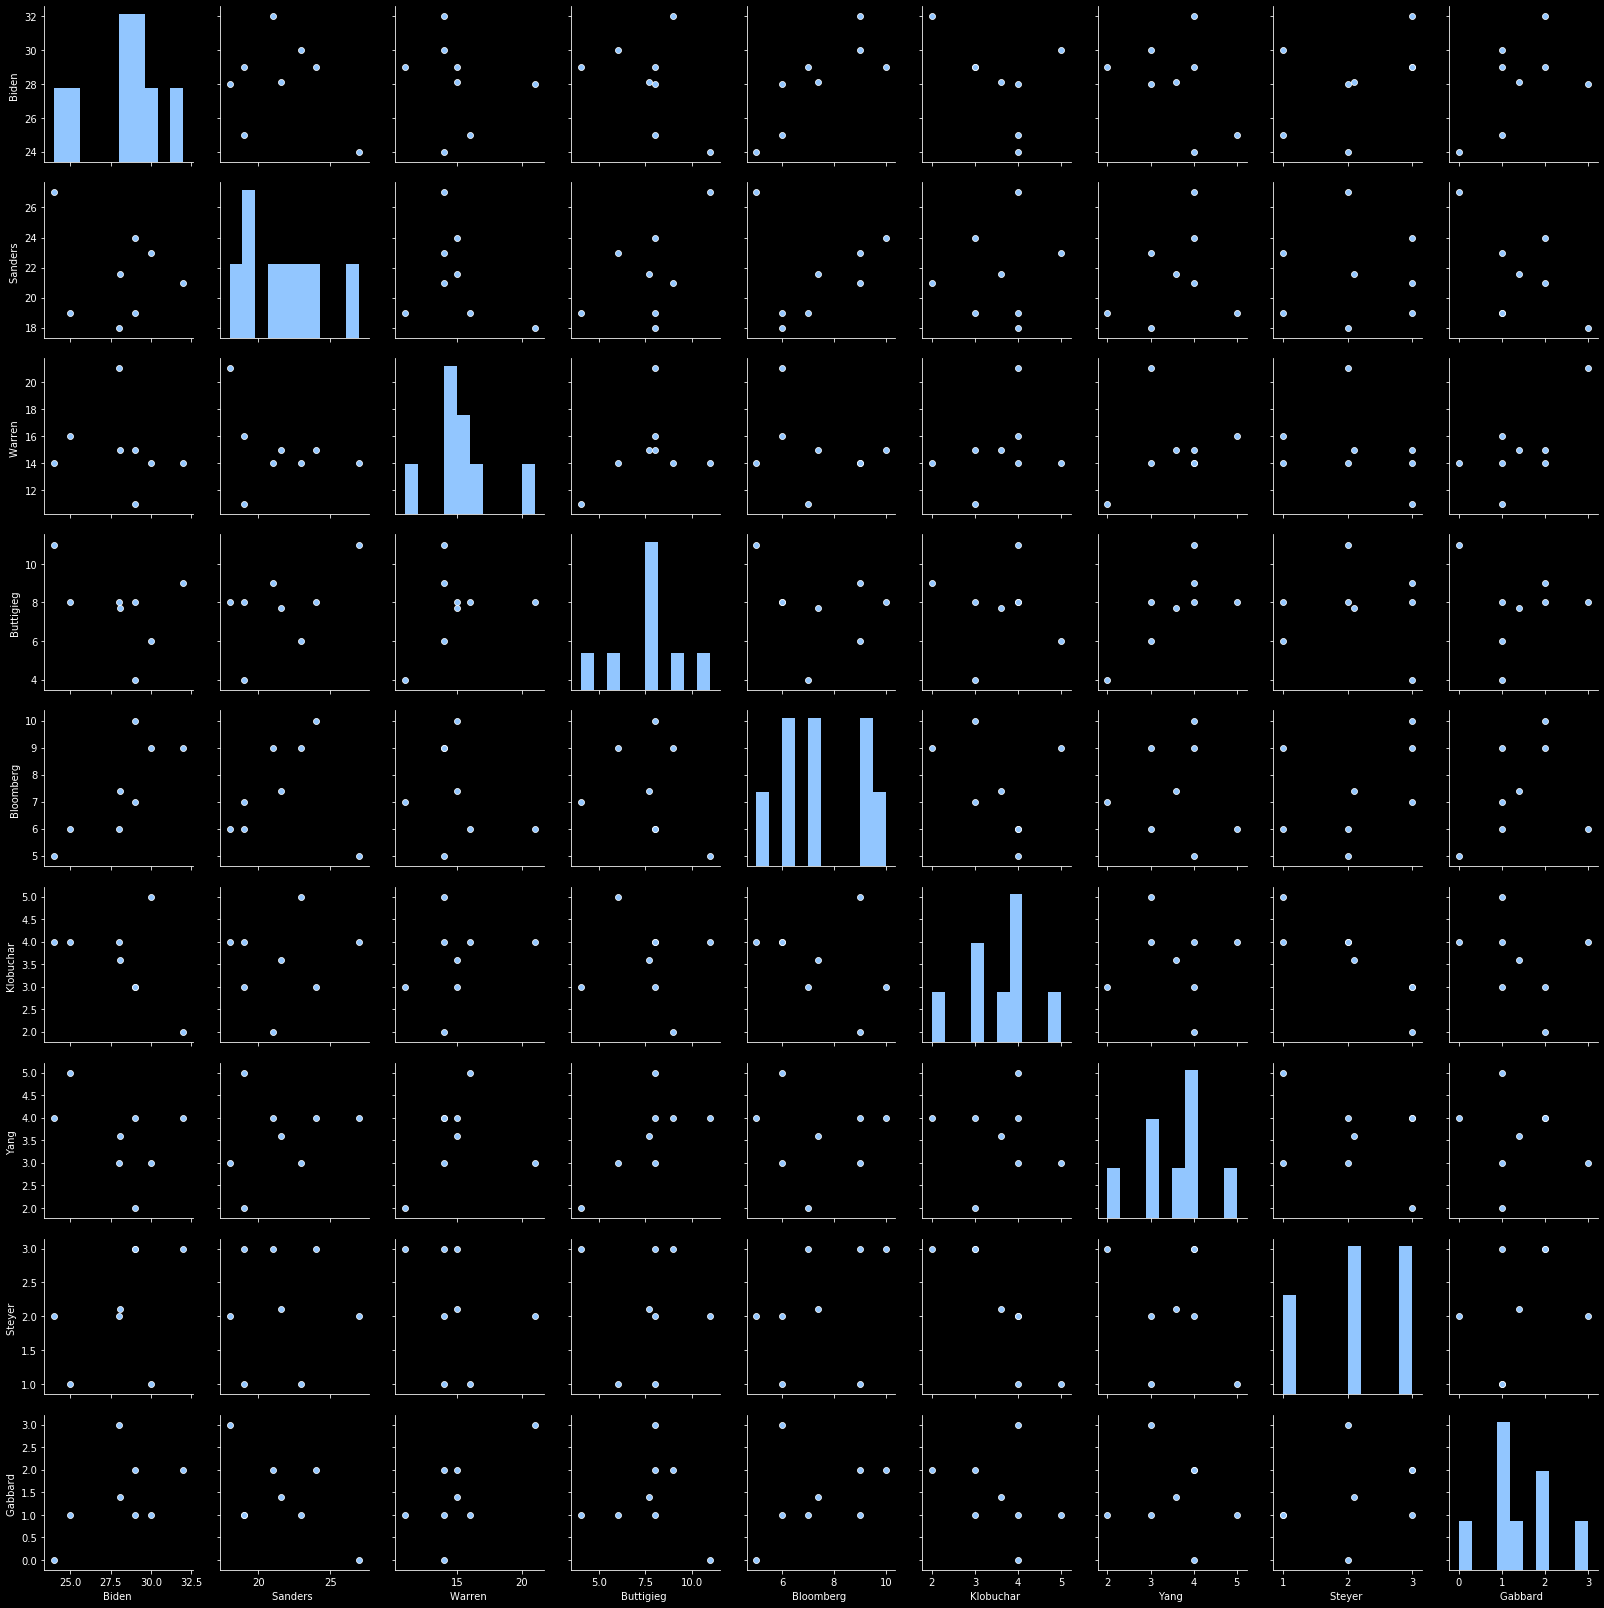

In [73]:
sb.pairplot(poll_table)

In [74]:
poll_table.describe()

,Biden,Sanders,Warren,Buttigieg,Bloomberg,Klobuchar,Yang,Steyer,Gabbard
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000
mean,28.137500,21.575000,15.000000,7.712500,7.42500,3.575000,3.575000,2.137500,1.425000
std,2.587297,3.016976,2.828427,2.050392,1.76129,0.903564,0.903564,0.833131,0.903564
min,24.000000,18.000000,11.000000,4.000000,5.00000,2.000000,2.000000,1.000000,0.000000
25%,27.250000,19.000000,14.000000,7.275000,6.00000,3.000000,3.000000,1.750000,1.000000
50%,28.550000,21.300000,14.500000,8.000000,7.20000,3.800000,3.800000,2.050000,1.200000
75%,29.250000,23.250000,15.250000,8.250000,9.00000,4.000000,4.000000,3.000000,2.000000
max,32.000000,27.000000,21.000000,11.000000,10.00000,5.000000,5.000000,3.000000,3.000000


In [75]:
poll_table.sum()

Poll          RCP AverageCNNCNNMonmouthMonmouthEconomist/You...
Date          1/8 - 1/211/16 - 1/191/16 - 1/201/19 - 1/211/1...
Sample          --500 RV372 RV470 LV12402 LV1086 LV451 RV651 RV
Biden                                                     225.1
Sanders                                                   172.6
Warren                                                      120
Buttigieg                                                  61.7
Bloomberg                                                  59.4
Klobuchar                                                  28.6
Yang                                                       28.6
Steyer                                                     17.1
Gabbard                                                    11.4
Bennet                                              0.80101--21
Delaney                                             0.30001--10
Spread        Biden +6.5Sanders +3Biden +7Biden +7Biden +5Bi...
dtype: object